In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Catphan = np.load('/home/xcite/MV_CBCT/projections/Catphan.npy')
Catphan2 = np.load('/home/xcite/MV_CBCT/projections/Catphan2.npy')
Air = np.load('/home/xcite/MV_CBCT/projections/air.npy')

In [3]:
projections = -np.log(Catphan2/Air)

In [4]:
recon_exp = np.load('/home/xcite/MV_CBCT/recon_exp.npy')

In [3]:
recon_fc = np.load('/home/xcite/fastcat-0.0.1/fastcat/data/recons/404_new_file.npy')

In [4]:
plt.figure()
plt.imshow(np.flipud(np.rot90(recon_fc[:,:,55],-1)))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
plt.figure()
plt.hist(10*recon_exp[76].flatten(),bins=200,density=True,histtype='step')

plt.hist(recon_fc[5].flatten(),bins=200,density=True,histtype='step');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [25]:
plt.figure()
plt.hist(10*recon_exp[76].flatten(),bins=200,density=True,histtype='step');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
plt.figure()
plt.imshow(recon_fc[5]-10*recon_exp[76])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
recon_fc = np.load('/home/xcite/MV_CBCT/jericho_data/Jericho/test_scan_kv_phantom/dicom_volume.npy')

In [5]:
mm = np.nanmean(recon_fc[5,390:400,390:400])
mm_air = np.nanmean(recon_fc[5,440:490,440:490])

im_HU = (recon_fc[5,:,:] - mm)/(mm_air - mm)*-1000

plt.figure()
plt.imshow(im_HU)

/home/xcite/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/xcite/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
from astropy import stats

In [39]:
def create_mask(shape):

    im = np.zeros([512,512])
    #im = np.zeros([256,256])
    ii = 1

    # CTMAT(x) formel=H2O dichte=x
    LEN = 100

    A0  = 90.0*np.pi/180

    # Phantom 
    # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */
    
    create_circular_mask(x= 6.5*cos(A0+1/6*np.pi),  y= 6.5*sin(A0+1/6*np.pi),  r=1.0, index = ii, image = im)

    rad = 5.75

    for ii,jj in enumerate([2,3,4,6,8,9,10,12]):

        # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
        create_circular_mask(x= rad*cos(A0+jj/6*np.pi),  y= rad*sin(A0+jj/6*np.pi),  r=0.4, index = ii +2, image = im)

    return im

def create_circular_mask(x, y, r, index, image):

    h,w = image.shape

    center = [x*int(w/2)/10 + int(w/2),y*int(h/2)/10 + int(h/2)]

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if r is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= r*int(w/2)/10


    image[mask] = index
    
recon_slice = im_HU

im = create_mask(recon_slice.shape)

contrast = []
noise = []
cnr = []
ci = []

ii = 1

ref_mean = np.mean(recon_slice[im == 5])
ref_std = np.std(recon_slice[im == 5])

for ii in range(2,int(np.max(im)+1)):

    nsample = len(recon_slice[im == ii])

    if nsample > 2:

        noise.append(np.std(recon_slice[im == ii]))

        booted = stats.bootstrap(recon_slice[im == ii],100,samples=int(nsample/5),bootfunc=np.mean)# - ref_mean)

        ci.append(np.std(booted))
        contrast.append(np.mean(booted))

        cnr.append(contrast[-1]/(np.sqrt(noise[-1]**2)))

ci_v = [2*(ci[ii]/ref_mean)*100 for ii in range(len(ci))]


im_HU2 = im_HU.copy()

im_HU2[im > 1] = np.NaN

plt.figure()
plt.imshow(im_HU2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [41]:
star_data_gos = [0, -745.8193979933105,
0, -709.0301003344478,
0.854368932038835, -30.100334448160538,
0.9449838187702266, 43.478260869565474,
0.9967637540453074, 113.71237458193991,
1.1477885652642934, 197.32441471571929,
1.3592233009708738, 394.64882943143834,
1.866235167206041, 842.8093645484951
]

plt.figure()
plt.plot(star_data_gos[1::2])
plt.plot(np.array(sorted(contrast)))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<IPython.core.display.Javascript object>


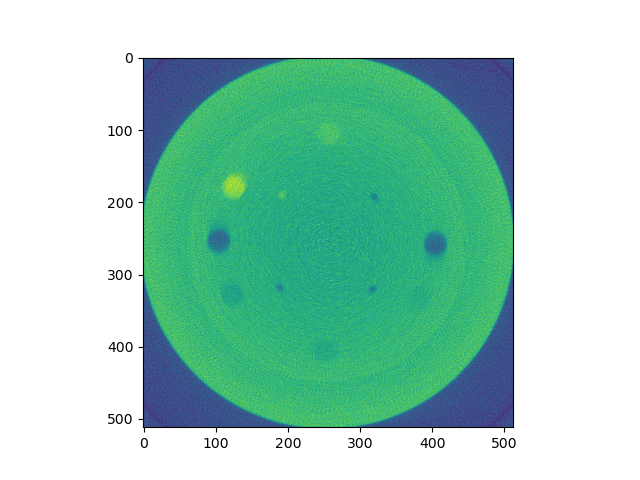

In [54]:
contrasts_fc = contrast

mm = np.nanmean(recon_exp[76,200:300,200:300])
mm_air = np.nanmean(recon_exp[76,450:490,450:490])

im_HU = (recon_exp[76,:,:] - mm)/(mm_air - mm)*-1000

plt.figure()
plt.imshow(im_HU)

<IPython.core.display.Javascript object>


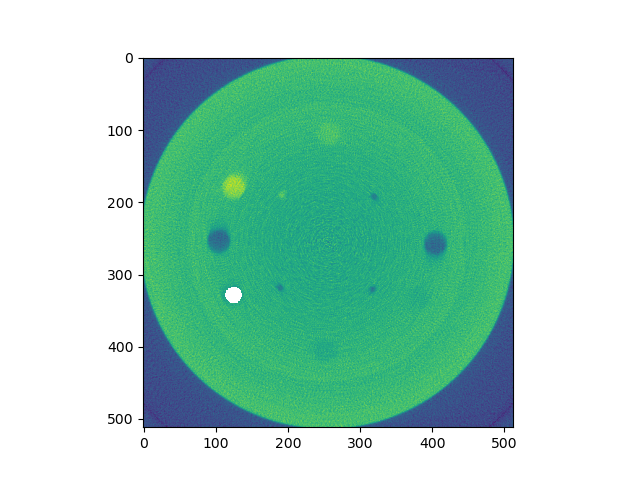

In [58]:
def create_mask(shape):

    im = np.zeros([512,512])
    #im = np.zeros([256,256])
    ii = 1

    # CTMAT(x) formel=H2O dichte=x
    LEN = 100

    A0  = (90.0 + 1)*np.pi/180 

    # Phantom 
    # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
    create_circular_mask(x= 0.000,  y= 0.000,  r=10.0, index = ii, image = im)

    rad = 5.85

    for ii,jj in enumerate([2,3,4,5,6,7,8,9,10,11,12,13]):

        # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
        create_circular_mask(x= rad*cos(A0+jj/6*np.pi),  y= rad*sin(A0+jj/6*np.pi),  r=0.4, index = ii +2, image = im)

    return im

def create_circular_mask(x, y, r, index, image):

    h,w = image.shape

    center = [x*int(w/2)/10 + int(w/2),y*int(h/2)/10 + int(h/2)]

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if r is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= r*int(w/2)/10


    image[mask] = index
    
recon_slice = im_HU

im = create_mask(recon_slice.shape)

contrast = []
noise = []
cnr = []
ci = []

ii = 1

ref_mean = np.mean(recon_slice[im == 5])
ref_std = np.std(recon_slice[im == 5])

for ii in range(2,int(np.max(im)+1)):

    nsample = len(recon_slice[im == ii])

    if nsample > 2:

        noise.append(np.std(recon_slice[im == ii]))

        booted = np.abs(stats.bootstrap(recon_slice[im == ii],100,samples=int(nsample/5),bootfunc=np.mean) - ref_mean)

        ci.append(np.std(booted))
        contrast.append(np.mean(booted))

        cnr.append(contrast[-1]/(np.sqrt(noise[-1]**2)))

ci_v = [2*(ci[ii]/ref_mean)*100 for ii in range(len(ci))]


im_HU2 = im_HU.copy()

im_HU2[im == 2] = np.NaN

plt.figure()
plt.imshow(im_HU2)

<IPython.core.display.Javascript object>


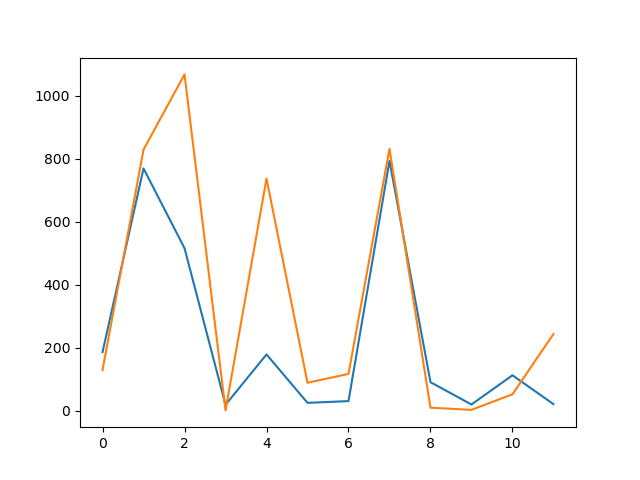

In [56]:
plt.figure()
plt.plot(contrast)
plt.plot(contrasts_fc)

<IPython.core.display.Javascript object>


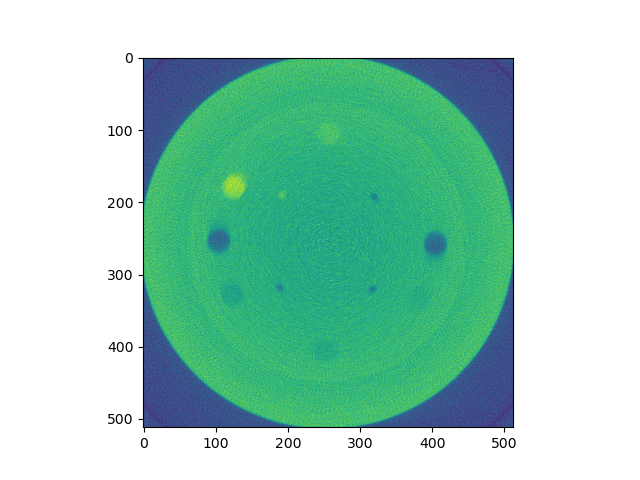

In [30]:
mm = np.nanmean(recon_exp[76,200:300,200:300])
mm_air = np.nanmean(recon_exp[76,450:490,450:490])

im_HU = (recon_exp[76,:,:] - mm)/(mm_air - mm)*-1000

plt.figure()
plt.imshow(im_HU)

<IPython.core.display.Javascript object>


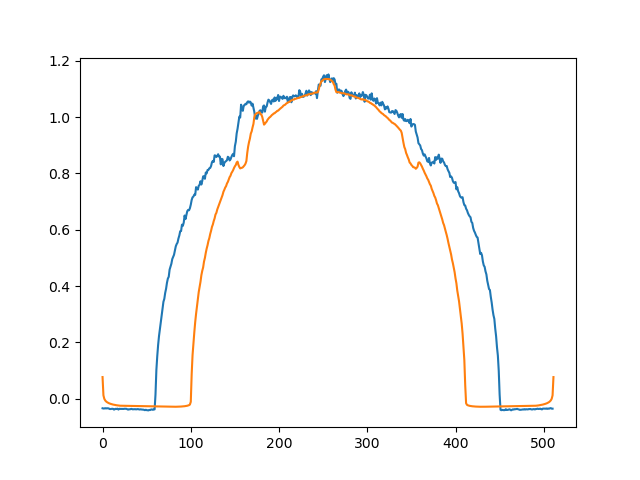

In [44]:
plt.figure()
plt.plot(np.mean(mc_proj[50:100],0))
plt.plot(np.mean(fc_proj[270,10:-10]/10.8,0))